# Lab: Moneyball

## Batter up

The movie _Moneyball_ focuses on the “quest for the secret of success in baseball”. It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player’s ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we’ll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team’s runs scored in a season.

## The data
Let’s load up the data for the 2011 season.


In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 

from pathlib import Path

%matplotlib inline

sns.set_theme()

mlb_path = Path("../datasets/mlb11.csv")

mlb_df = pd.read_csv(mlb_path)

mlb_df.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


In addition to runs scored, there are seven traditionally used variables in the data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins†. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis we’ll consider the seven traditional variables. At the end of the lab, you’ll work with the newer variables on your own.

### Exercise 1 - What type of plot would you use to display the relationship between `runs` and one of the other numerical variables? Plot this relationship using the variable `at_bats` as the predictor. Does the relationship look linear? If you knew a team’s `at_bats`, would you be comfortable using a linear model to predict the number of runs?

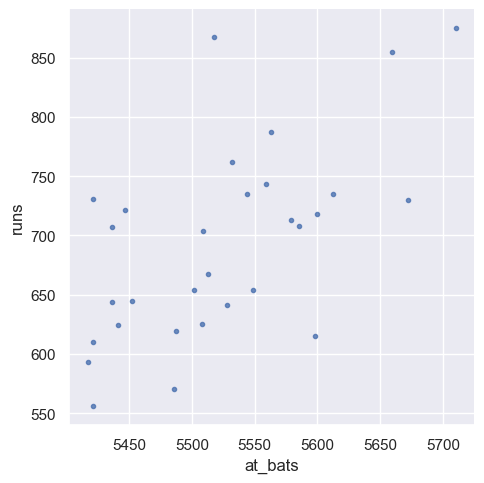

In [42]:
sns.lmplot(x="at_bats", y="runs", data=mlb_df, markers=".", fit_reg=False)

plt.show()

A linear model would be fairly good.

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [43]:
display(mlb_df[["at_bats", "runs"]].corr())

,at_bats,runs
at_bats,1.000000,0.610627
runs,0.610627,1.000000


## Sum of squared residuals
Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It’s also useful to be able to describe the relationship of two numerical variables, such as `runs` and `at_bats` above.

### Exercise 2 - Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations.

The two variables have a weak (see the correlation coefficient which is 0.6) positive relationship.

Just as we used the mean and standard deviation to summarize a single variable, we can summarize the relationship between these two variables by finding the line that best follows their association.

## The linear model

In [44]:
m1 = sm.OLS.from_formula("runs ~ at_bats", data=mlb_df).fit()

display(m1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           0.000339
Time:                        11:48:20   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.003   -4537.959   -1040.526
at_bats        0.6305      0.155      4.080      0.000       0.314       0.947
==============================================================================
Omnibus:                        2.579   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.559
Skew:                           0.544   Prob(JB):                        0.459
Kurtosis:                       3.252   Cond. No.                     3.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With this table, we can write down the least squares regression line for the linear model:

$$
    \hat{runs} = -2789.2429 + 0.6305 \times at\_bats
$$

### Exercise 4 - Fit a new model that uses `homeruns` to predict `runs`. Using the estimates from the R output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?

In [46]:
m2 = sm.OLS.from_formula("runs ~ homeruns", data=mlb_df).fit()

display(m2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   runs   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.90e-07
Time:                        11:49:13   Log-Likelihood:                -159.66
No. Observations:                  30   AIC:                             323.3
Df Residuals:                      28   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.2389     41.678      9.963      0.000     329.866     500.612
homeruns       1.8345      0.268      6.854      0.000       1.286       2.383
==============================================================================
Omnibus:                        0.700   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.736
Skew:                           0.165   Prob(JB):                        0.692
Kurtosis:                       2.307   Cond. No.                         693.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
    \hat{run} = 5.6334 + 3.1549 \times home\_run
$$

The slope tells us that at each unitary increase in home_run, run increase by 3.1549.

## Prediction and prediction errors

Let’s create a scatterplot with the least squares line laid on top.


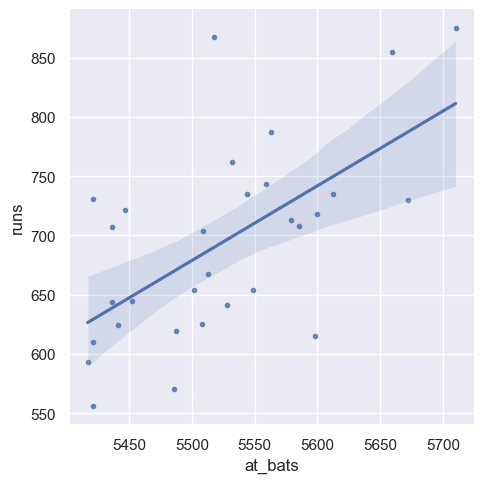

In [47]:
sns.lmplot(x="at_bats", y="runs", data=mlb_df, markers=".", fit_reg=True)

plt.show()

This line can be used to predict y at any value of x. When predictions are made for values of x that are beyond the range of the observed data, it is referred to as _extrapolation_ and is not usually recommended. However, predictions made within the range of the data are more reliable. They’re also used to compute the residuals.

### Exercise 5 - If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction?

Let's plot the residuals.

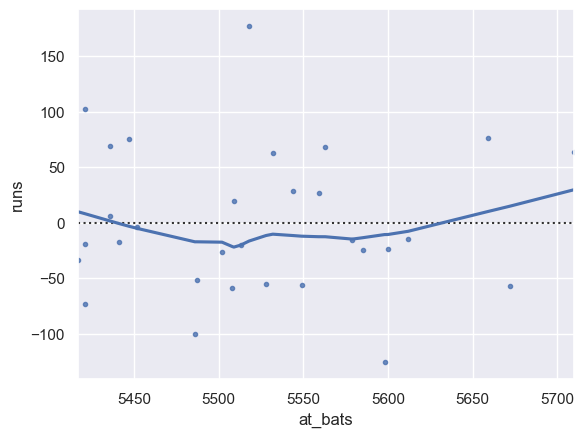

In [82]:
sns.residplot(
    x="at_bats", 
    y="runs", 
    data=mlb_df, 
    lowess=True, 
    scatter_kws={
        "marker": "."
    }
)

plt.show()

From the residual plot, we csan say we would be overestimating.

## Model diagnostics
To assess whether the linear model is reliable, we need to check for (1) linearity, (2) nearly normal residuals, and (3) constant variability.

1. Linearity: You already checked if the relationship between runs and at-bats is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. at-bats.


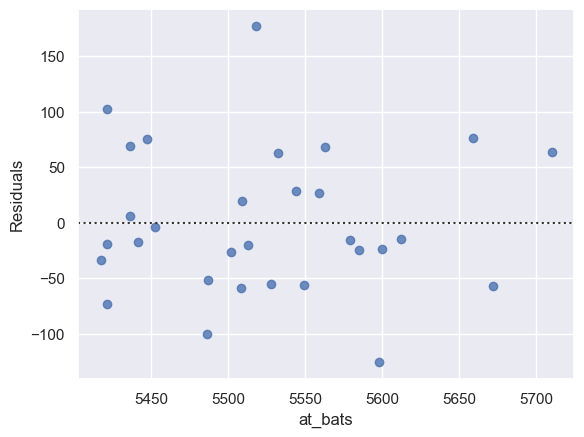

In [91]:
sns.residplot(
    y=m1.resid, 
    x="at_bats", 
    data=mlb_df
)

plt.ylabel("Residuals")
plt.show()

### Exercise 6 - Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats?

The variance is constant, so the linearity assumption is met.

2. Nearly normal residuals: To check this condition, we can look at a histogram, or a normal probability plot of the residuals.

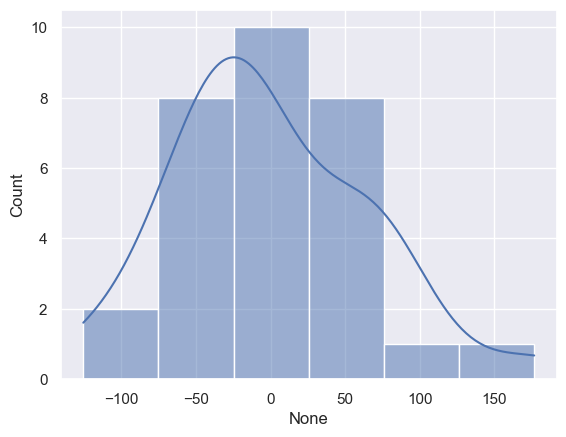

In [93]:
sns.histplot(x=m1.resid, kde=True)

plt.show()

### Exercise 7 - Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?

The normal residuals condition is met, even though marginally.

3. Constant variability:

### Exercise 8 Based on the plot in (1), does the constant variability condition appear to be met?

It seems to be met.

## On Your Own

1. Choose another traditional variable from mlb11 that you think might be a good predictor of runs. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?

Let's analyse the correlation matrix for `at_bats`.

In [107]:
mlb_df.drop("team", axis=1).corr()["runs"].sort_values(ascending=False).to_frame()

,runs
runs,1.000000
new_obs,0.966916
new_slug,0.947032
new_onbase,0.921469
bat_avg,0.809986
hits,0.801211
homeruns,0.791558
at_bats,0.610627
wins,0.600809
stolen_bases,0.053981


The variable `wins` seems to be correlated with `runs`. Let's study that.

In [114]:
m2 = sm.OLS.from_formula("runs ~ wins", data=mlb_df).fit()

m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   runs   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     15.82
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           0.000447
Time:                        14:57:35   Log-Likelihood:                -167.72
No. Observations:                  30   AIC:                             339.4
Df Residuals:                      28   BIC:                             342.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    342.1214     89.223      3.834      0.001     159.356     524.886
wins           4.3410      1.092      3.977      0.000       2.105       6.577
==============================================================================
Omnibus:                        0.155   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.345
Skew:                           0.118   Prob(JB):                        0.842
Kurtosis:                       2.531   Cond. No.                         595.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

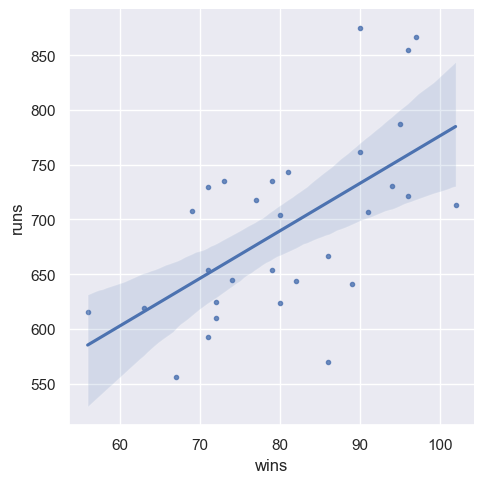

In [115]:
sns.lmplot(x="wins", y="runs", data=mlb_df, markers=".", fit_reg=True)

plt.show()

There seem to be a linear relationship.

2. How does this relationship compare to the relationship between `runs` and `at_bats`? Use the $R^2$ values from the two model summaries to compare. Does your variable seem to predict `runs` better than `at_bats`? How can you tell?

The $R^2$ coeffient for `wins` is lower than the one previously seen, hence the correlation is lower.

3. Now that you can summarize the linear relationship between two variables, investigate the relationships between runs and each of the other five traditional variables. Which variable best predicts `runs`? Support your conclusion using the graphical and numerical methods we’ve discussed (for the sake of conciseness, only include output for the best variable, not all five).

The variable `new_obs` seems the one to predict better `runs`.

4. Now examine the three newer variables. These are the statistics used by the author of _Moneyball_ to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we’ve analyzed, which seems to be the best predictor of `runs`? Using the limited (or not so limited) information you know about these baseball statistics, does your result make sense?